In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
jupyterhub = '/dados/home/joaoviniciuspr'
jupyterlab = '/Users/jjoao/OneDrive/Documentos/Faculdade'
ju = jupyterhub
directory = ju+'/IC_Redes/Trabalhos/UCM/Fase1/Homem_de_Ferro_1'

In [243]:
ironman=pd.read_csv(directory+'/Degree.csv')
ironman=ironman.set_index("ID")
ironman.fillna('',inplace=True)

In [244]:
def dist_degree(df,col,nodes="nós"):
    df[col].apply(lambda x: 1 if x==0 else x )
    count = df.groupby(col).size()
    fig, ax = plt.subplots(1,2,figsize=(16,8))
    ax[0].plot(count.index,count.values,"o")
    ax[0].set_xlabel("Grau")
    ax[0].set_ylabel("Número de "+nodes)
    ax[0].set_title("Distribuição dos graus")
    ax[1].plot(np.log(count.index),np.log(count.values),"o")
    ax[1].set_xlabel("log(Grau)")
    ax[1].set_ylabel("log(Número de "+nodes+")")
    ax[1].set_ylim(bottom=0)
    ax[1].set_title("Distribuição dos graus no log X log") 

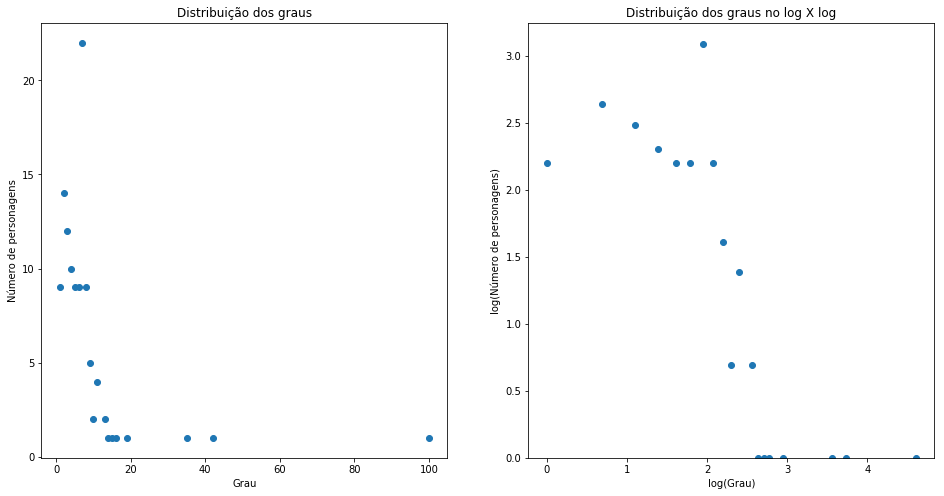

In [245]:
dist_degree(ironman,"Degree","personagens")

In [246]:
def random(n,p):
    d = {"node":list(range(n)),"degree":n*[0]}
    df = pd.DataFrame(d,columns=["node","degree"],index=d["node"])
    for i in range(n):
        for j in range(i-1):
            r = np.random.random()
            if r < p:
                df.iloc[i][1] += 1
                df.iloc[j][1] += 1
    dist_degree(df,"degree")

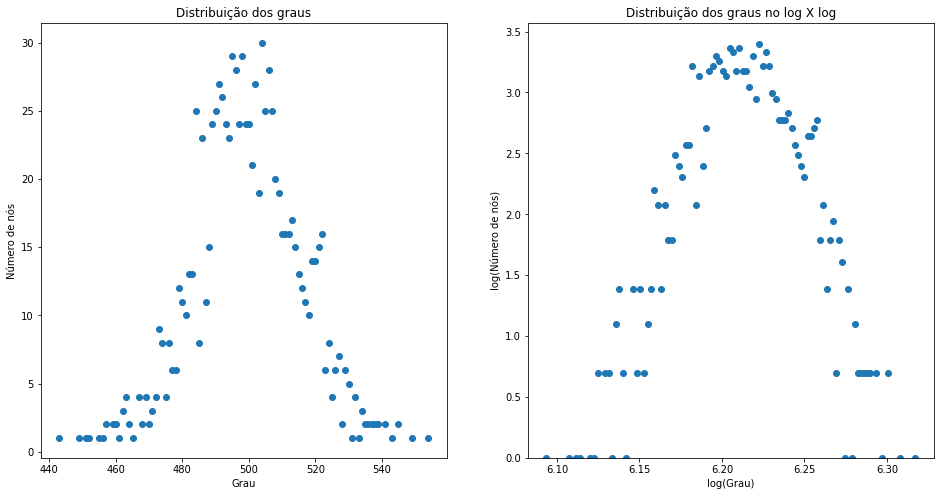

In [247]:
random(1000,0.5)

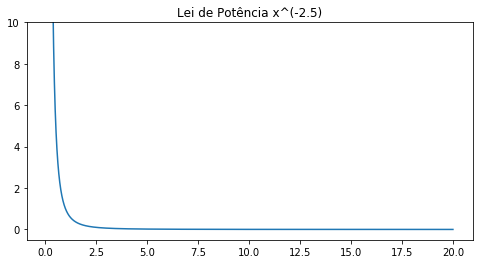

In [248]:
x = np.linspace(0.1, 20, 10000)
y1 = x**(-2.5)
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(x,y1)
ax.set_ylim([-0.5,10])
ax.set_title("Lei de Potência x^(-2.5)") 
plt.show()

In [252]:
def scale_free(n,p):
    d = {"node":list(range(n)),"degree":n*[0]}
    df = pd.DataFrame(d,columns=["node","degree"],index=d["node"])
    for i in range(n):
        for j in range(i-1):
            r = np.random.random()
            maximum = max(df["degree"].max(),1)
            if r < (max(df.iloc[j][1],1)/maximum):
                df.iloc[i][1] += 1
                df.iloc[j][1] += 1
    dist_degree(df,"degree")